In [1]:
from IPython.display import display, HTML
from datetime import datetime

import json as json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as gp
import seaborn as sns

In [2]:
df = pd.read_csv("raw_data.csv")
df = df.drop(columns=["Sorszám", "Alapbetegségek"])
df.drop(df.index[0:215],0,inplace=True)
df = df.reindex(index=df.index[::-1])
df.reset_index(drop=True, inplace=True)
df.tail(5)

C:\Users\bornalid\AppData\Local\Temp/ipykernel_18008/2552302721.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.index[0:215],0,inplace=True)


,Nem,Kor
32180,Férfi,80
32181,Nõ,54
32182,Férfi,71
32183,Férfi,68
32184,Nõ,86


In [3]:
read_file = pd.DataFrame(pd.read_excel("dates.xlsx"))
read_file.to_csv ("dates.csv",
                  index = None,
                  header=True)
df1 = pd.read_csv("dates.csv", usecols=['Dátum', 'Elhunytak', 'New Deaths'])
df1.drop(df1.index[0:12],0,inplace=True)
df1['Elhunytak'] = df1['Elhunytak'].fillna(0)
df1['New Deaths'] = df1['New Deaths'].fillna(0)
df1.reset_index(drop=True, inplace=True)
print(df1.head())

        Dátum  Elhunytak  New Deaths
0  2020-03-16        1.0         1.0
1  2020-03-17        1.0         0.0
2  2020-03-18        1.0         0.0
3  2020-03-19        1.0         0.0
4  2020-03-20        4.0         3.0


C:\Users\bornalid\AppData\Local\Temp/ipykernel_18008/418362537.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(df1.index[0:12],0,inplace=True)


In [4]:
read_file = pd.DataFrame(pd.read_excel("dates.xlsx"))
read_file.to_csv ("dates.csv",
                  index = None,
                  header=True)
df1 = pd.read_csv("dates.csv")
df1 = pd.read_csv("dates.csv", usecols=['Dátum', 'Elhunytak', 'New Deaths'])
df1.drop(df1.index[0:12],0,inplace=True)
df1['Elhunytak'] = df1['Elhunytak'].fillna(0)
df1['New Deaths'] = df1['New Deaths'].fillna(0)
df1.reset_index(drop=True, inplace=True)
print(df1.head())

        Dátum  Elhunytak  New Deaths
0  2020-03-16        1.0         1.0
1  2020-03-17        1.0         0.0
2  2020-03-18        1.0         0.0
3  2020-03-19        1.0         0.0
4  2020-03-20        4.0         3.0


C:\Users\bornalid\AppData\Local\Temp/ipykernel_18008/114563639.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(df1.index[0:12],0,inplace=True)


In [5]:
repeat = df1["New Deaths"]
data = pd.DataFrame(np.repeat(df1.values, repeat,axis=0), columns= df1.columns)
data.head()

,Dátum,Elhunytak,New Deaths
0,2020-03-16,1.0,1.0
1,2020-03-20,4.0,3.0
2,2020-03-20,4.0,3.0
3,2020-03-20,4.0,3.0
4,2020-03-22,6.0,2.0


In [6]:
new_data = pd.merge(data, df, left_index=True, right_index=True)
new_data = new_data.drop(columns=['Elhunytak', 'New Deaths'])
new_data["Dátum"]=pd.to_datetime(new_data["Dátum"])
new_data.set_index("Dátum", inplace=True)
print(new_data.head())
len(new_data)

              Nem  Kor
Dátum                 
2020-03-16     Nő   87
2020-03-20     Nő   85
2020-03-20  Férfi   81
2020-03-20  Férfi   61
2020-03-22  Férfi   49


32171

In [7]:
df1["Dátum"]=pd.to_datetime(df1["Dátum"])
df1.set_index("Dátum", inplace=True)
data_with_dates=pd.merge(df1,new_data, how='inner', left_index=True, right_index=True)
data_with_dates.to_csv("data_with_dates.csv")
data_with_dates.reset_index(level=0, inplace=True)

In [8]:
bins= pd.DataFrame(pd.cut(x=data_with_dates['Kor'], bins=[0, 9, 19, 29, 39, 49,59,69, 79, 89,99, 109]))
bins.rename(columns={'Kor' :'Age'},inplace=True)
bins

,Age
0,"(79, 89]"
1,"(79, 89]"
2,"(79, 89]"
3,"(59, 69]"
4,"(39, 49]"
...,...
32166,"(69, 79]"
32167,"(59, 69]"
32168,"(79, 89]"
32169,"(69, 79]"


In [9]:
data_with_dates=pd.concat((data_with_dates,bins), axis = 1)
data_with_dates.drop(columns=["Elhunytak","New Deaths"], inplace = True)
data_with_dates.head(20)

,Dátum,Nem,Kor,Age
0,2020-03-16,Nő,87,"(79, 89]"
1,2020-03-20,Nő,85,"(79, 89]"
2,2020-03-20,Férfi,81,"(79, 89]"
3,2020-03-20,Férfi,61,"(59, 69]"
4,2020-03-22,Férfi,49,"(39, 49]"
5,2020-03-22,Férfi,65,"(59, 69]"
6,2020-03-23,Férfi,69,"(59, 69]"
7,2020-03-23,Nő,79,"(69, 79]"
8,2020-03-24,Férfi,83,"(79, 89]"
9,2020-03-25,Férfi,62,"(59, 69]"


In [10]:
rep = pd.DataFrame(data_with_dates.groupby(pd.Grouper(freq='W', key='Dátum'))['Nem'].count())
rep.reset_index(inplace=True)
rep1 = rep["Nem"]
mydata = pd.DataFrame(np.repeat(rep.values, rep1,axis=0), columns= rep.columns)
mydata["Date"] = mydata["Dátum"] 
mydata["Count"] = mydata["Nem"]
mydata.drop(columns=["Dátum", "Nem"], inplace = True)
mydata.head()

,Date,Count
0,2020-03-22,6
1,2020-03-22,6
2,2020-03-22,6
3,2020-03-22,6
4,2020-03-22,6


In [11]:
date_age=pd.merge(mydata, data_with_dates, how='inner', left_index=True, right_index=True)
date_age.head()
date_age.drop(columns=["Dátum"], inplace = True)
date_age["Date"] = date_age["Date"].dt.date
date_age.drop(columns=["Count", "Nem", "Kor" ], inplace = True)
date_age.head(10)

,Date,Age
0,2020-03-22,"(79, 89]"
1,2020-03-22,"(79, 89]"
2,2020-03-22,"(79, 89]"
3,2020-03-22,"(59, 69]"
4,2020-03-22,"(39, 49]"
5,2020-03-22,"(59, 69]"
6,2020-03-29,"(59, 69]"
7,2020-03-29,"(69, 79]"
8,2020-03-29,"(79, 89]"
9,2020-03-29,"(59, 69]"


In [12]:
aggregated_data = date_age.groupby( list(date_age))[['Date']].count()
aggregated_data = aggregated_data.unstack(level = 0)
aggregated_data.columns = aggregated_data.columns.droplevel()
aggregated_data = aggregated_data.reindex(index=aggregated_data.index[::-1])
aggregated_data.to_csv("aggregated_data.csv")
aggregated_data.head()

Date,2020-03-22,2020-03-29,2020-04-05,2020-04-12,2020-04-19,2020-04-26,2020-05-03,2020-05-10,2020-05-17,2020-05-24,...,2021-09-19,2021-09-26,2021-10-03,2021-10-10,2021-10-17,2021-10-24,2021-10-31,2021-11-07,2021-11-14,2021-11-21
Age,,,,,,,,,,,,,,,,,,,,,
"(99, 109]",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
"(89, 99]",0,0,5,6,9,8,8,8,2,2,...,4,0,4,5,3,6,16,35,47,23
"(79, 89]",3,3,5,16,25,24,24,34,16,14,...,9,9,14,19,25,34,63,123,174,91
"(69, 79]",0,2,7,22,29,25,20,12,11,9,...,11,8,19,21,24,38,72,140,206,83
"(59, 69]",2,2,5,16,16,16,11,9,8,6,...,7,10,7,18,13,30,47,95,135,59


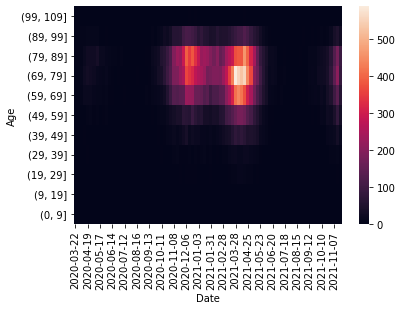

In [13]:
ax = sns.heatmap(aggregated_data)

In [14]:
weekly=aggregated_data.columns

In [15]:
rows=aggregated_data.index
rows=rows.categories[:10]
rows=rows[::-1]

In [16]:
table=aggregated_data.to_numpy()
new_table=table[1:,:]

In [17]:
file = open("populacio.json")
population = json.load(file)
dict_to_list = list(population.items())
new_list= pd.DataFrame(dict_to_list,columns=['Age','popln'])
new_list["Age"]=new_list["Age"].astype(int)
new_list.head()

,Age,popln
0,0,89687
1,1,89995
2,2,90532
3,3,91234
4,4,91993


In [18]:
new_list['Age']= pd.DataFrame(pd.cut(x=new_list['Age'], bins=[-0.1, 9, 19, 29, 39, 49,59,69, 79, 89,99, 109]))
aggregated_list=new_list.groupby(['Age'])['popln'].agg('sum')

In [19]:
table1=aggregated_list.to_numpy()
table1=table1[::-1]
table1=table1.reshape(len(table1), 1)

In [20]:
table2=new_table/table1

In [21]:
aggregated_data_ratio=pd.DataFrame(table2,columns=weekly, index=rows)
aggregated_data_ratio.to_csv("aggregated_data_ratio.csv")
aggregated_data_ratio

Date,2020-03-22,2020-03-29,2020-04-05,2020-04-12,2020-04-19,2020-04-26,2020-05-03,2020-05-10,2020-05-17,2020-05-24,...,2021-09-19,2021-09-26,2021-10-03,2021-10-10,2021-10-17,2021-10-24,2021-10-31,2021-11-07,2021-11-14,2021-11-21
"(89, 99]",0.000000e+00,0.000000,0.000073,8.727907e-05,0.000131,1.163721e-04,0.000116,1.163721e-04,2.909302e-05,2.909302e-05,...,5.818605e-05,0.000000e+00,0.000058,0.000073,4.363954e-05,8.727907e-05,2.327442e-04,5.091279e-04,0.000684,0.000335
"(79, 89]",7.797068e-06,0.000008,0.000013,4.158436e-05,0.000065,6.237655e-05,0.000062,8.836677e-05,4.158436e-05,3.638632e-05,...,2.339120e-05,2.339120e-05,0.000036,0.000049,6.497557e-05,8.836677e-05,1.637384e-04,3.196798e-04,0.000452,0.000237
"(69, 79]",0.000000e+00,0.000002,0.000008,2.538786e-05,0.000033,2.884984e-05,0.000023,1.384792e-05,1.269393e-05,1.038594e-05,...,1.269393e-05,9.231948e-06,0.000022,0.000024,2.769584e-05,4.385175e-05,8.308753e-05,1.615591e-04,0.000238,0.000096
"(59, 69]",1.545466e-06,0.000002,0.000004,1.236373e-05,0.000012,1.236373e-05,0.000009,6.954597e-06,6.181864e-06,4.636398e-06,...,5.409131e-06,7.727330e-06,0.000005,0.000014,1.004553e-05,2.318199e-05,3.631845e-05,7.340964e-05,0.000104,0.000046
"(49, 59]",0.000000e+00,0.000000,0.000000,8.279215e-07,0.000005,7.451293e-06,0.000002,4.967529e-06,8.279215e-07,2.483764e-06,...,2.483764e-06,8.279215e-07,0.000003,0.000009,5.795450e-06,1.738635e-05,1.573051e-05,3.311686e-05,0.000064,0.000026
"(39, 49]",6.498596e-07,0.000000,0.000000,1.949579e-06,0.000001,0.000000e+00,0.000001,1.299719e-06,0.000000e+00,0.000000e+00,...,6.498596e-07,0.000000e+00,0.000000,0.000001,1.299719e-06,6.498596e-06,8.448174e-06,9.747893e-06,0.000020,0.000008
"(29, 39]",0.000000e+00,0.000000,0.000000,8.301084e-07,0.000002,8.301084e-07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,8.301084e-07,0.000000e+00,0.000000,0.000000,0.000000e+00,8.301084e-07,4.150542e-06,4.150542e-06,0.000007,0.000003
"(19, 29]",0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,9.016425e-07,0.000000e+00,9.016425e-07,...,9.016425e-07,0.000000e+00,0.000000,0.000000,9.016425e-07,9.016425e-07,9.016425e-07,9.016425e-07,0.000003,0.000000
"(9, 19]",0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000001,0.000000
"(0, 9]",0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.112136e-06,0.000000e+00,0.000000,0.000000


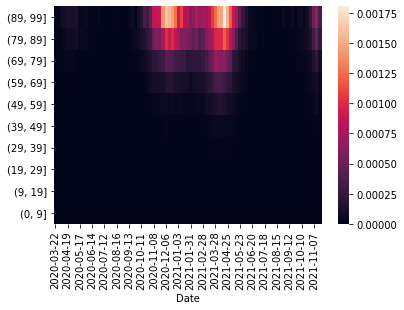

In [22]:
axx = sns.heatmap(aggregated_data_ratio)

In [23]:
df["Nem"].replace({"férfi": "Férfi", "nõ": "Nõ", "Nő": "Nõ"}, inplace=True)
df.head(20)

,Nem,Kor
0,Nõ,87
1,Nõ,85
2,Férfi,81
3,Férfi,61
4,Férfi,49
5,Férfi,65
6,Férfi,69
7,Nõ,79
8,Férfi,83
9,Férfi,62


In [24]:
df= df.groupby( list(df))[['Nem']].count()
df = df.unstack(level = 0)
df.reset_index(level=0, inplace=True)
df

Kor   Nem      
Nem      Férfi    Nõ
0      0   1.0   1.0
1      1   NaN   2.0
2      4   NaN   1.0
3     14   NaN   1.0
4     16   NaN   2.0
..   ...   ...   ...
87   100   5.0   9.0
88   101   1.0  10.0
89   102   1.0   2.0
90   103   1.0   1.0
91   104   NaN   1.0

[92 rows x 3 columns]

In [25]:
df.columns = df.columns.droplevel()
df.rename(columns = {"" : "Kor"}, inplace=True )
df['Férfi'] =df['Férfi'].fillna(0)
df['Nõ'] =df['Nõ'].fillna(0)
df

Nem,Kor,Férfi,Nõ
0,0,1.0,1.0
1,1,0.0,2.0
2,4,0.0,1.0
3,14,0.0,1.0
4,16,0.0,2.0
...,...,...,...
87,100,5.0,9.0
88,101,1.0,10.0
89,102,1.0,2.0
90,103,1.0,1.0


In [26]:
df["Férfi"]=-df["Férfi"]

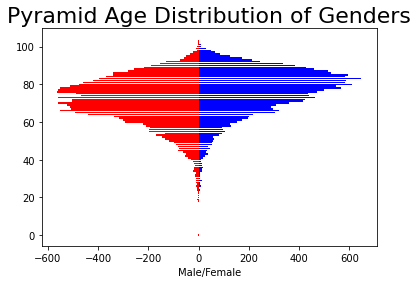

In [27]:
plt.barh(df["Kor"], df[ "Férfi"], color = 'r', lw=0, )
plt.barh(df["Kor"], df[ "Nõ"], color = 'b',  lw=0, )
plt.title("Pyramid Age Distribution of Genders", fontsize=22)
plt.xlabel("Male/Female")
plt.show()

In [31]:
fig = gp.Figure()
  
# Adding Male data to the figure
fig.add_trace(gp.Bar(y=df ["Kor"], x = df ["Férfi"], 
                     name = 'Male', 
                     orientation = 'h'))
  
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = df ["Kor"], x = df ["Nõ"],
                     name = 'Female', orientation = 'h'))
  
# Updating the layout for the graph
fig.update_layout(title = 'Population Pyramid for COVID-19 deceased, Hungary',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-600, -500, -400,-300,-200,-100,
                                          0, 100, 200, 300, 400, 500,600],
                                
                              ticktext = [600, 500, 400,300,200,100,
                                          0, 100, 200, 300, 400, 500,600],
                 
                                
                              title = 'Population',
                              title_font_size = 14)
                 )
  
fig.show()